In [ ]:
# Librerías básicas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, confusion_matrix, classification_report
)


try:
    from imblearn.under_sampling import RandomUnderSampler
    from imblearn.over_sampling import RandomOverSampler
    from imblearn.over_sampling import SMOTE
    imblearn_ok = True
except ImportError:
    imblearn_ok = False
    print("imblearn no está instalado (balanceo opcional).")

try:
    import shap
    shap_ok = True
except ImportError:
    shap_ok = False
    print("shap no está instalado (explicabilidad opcional).")

# Estilo básico de gráficos
plt.style.use("default")


In [ ]:

df = pd.read_csv("heart.csv")

print("Dimensiones del dataset:", df.shape)
df.head()


Dimensiones del dataset: (1025, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [13]:
# Información de tipos y nulos
df.info()

# Estadísticos descriptivos
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


target
1    526
0    499
Name: count, dtype: int64
target
1    0.513171
0    0.486829
Name: proportion, dtype: float64


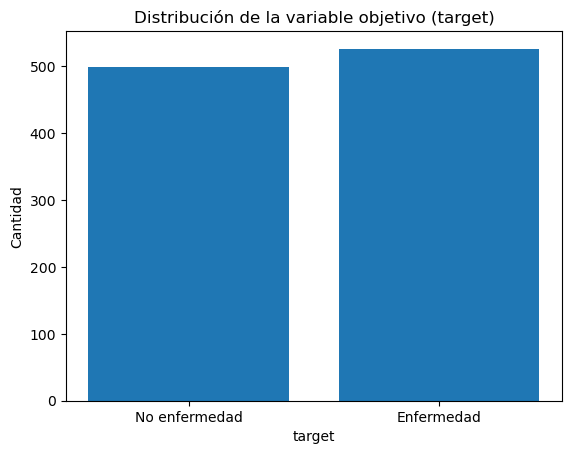

In [14]:
print(df["target"].value_counts())
print(df["target"].value_counts(normalize=True))

plt.figure()
plt.bar(df["target"].value_counts().index,
        df["target"].value_counts().values)
plt.xticks([0,1], ["No enfermedad", "Enfermedad"])
plt.xlabel("target")
plt.ylabel("Cantidad")
plt.title("Distribución de la variable objetivo (target)")
plt.show()


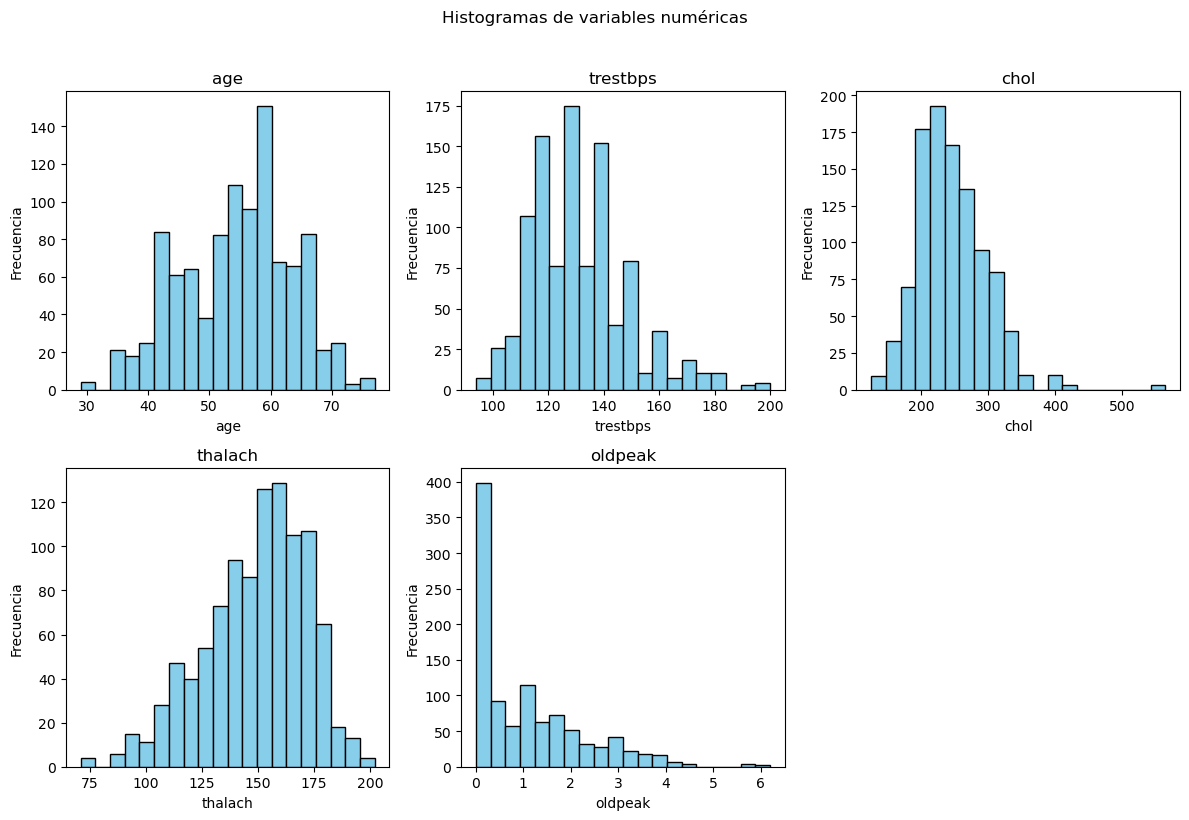

In [15]:
columnas_num = ["age", "trestbps", "chol", "thalach", "oldpeak"]

fig, axs = plt.subplots(2, 3, figsize=(12, 8))
axs = axs.ravel()

for i, col in enumerate(columnas_num):
    axs[i].hist(df[col], bins=20, color="skyblue", edgecolor="black")
    axs[i].set_title(col)
    axs[i].set_xlabel(col)
    axs[i].set_ylabel("Frecuencia")

# Ocultar eje sobrante si hay
if len(columnas_num) < len(axs):
    axs[-1].axis("off")

plt.suptitle("Histogramas de variables numéricas", y=1.02)
plt.tight_layout()
plt.show()


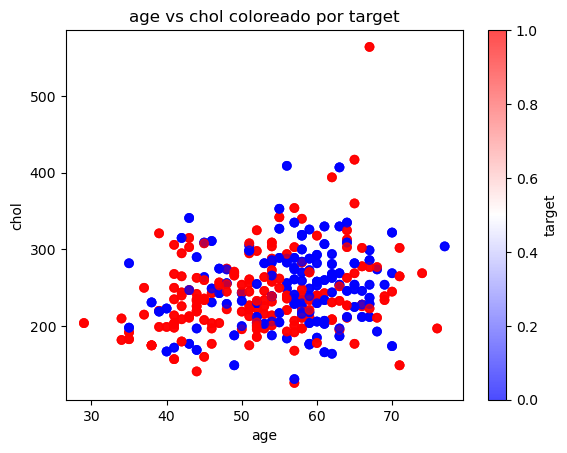

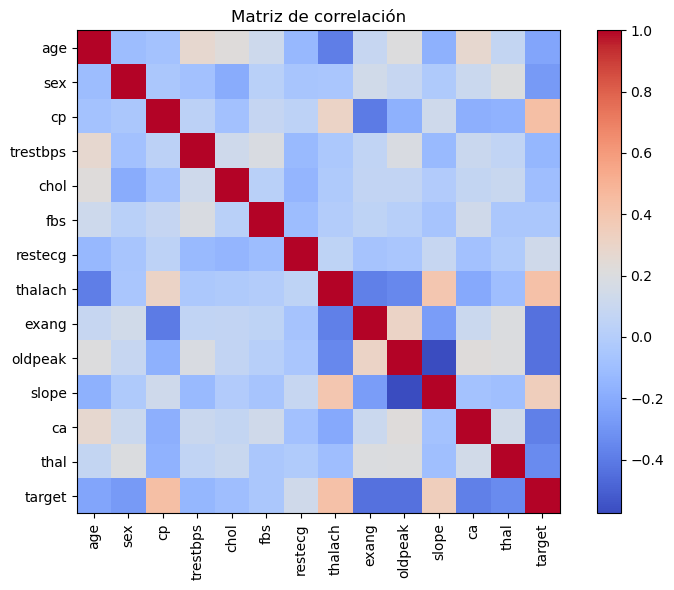

In [16]:
# Scatter age vs chol coloreado por target
plt.figure()
plt.scatter(df["age"], df["chol"], c=df["target"], cmap="bwr", alpha=0.7)
plt.xlabel("age")
plt.ylabel("chol")
plt.title("age vs chol coloreado por target")
plt.colorbar(label="target")
plt.show()

# Matriz de correlación con imshow (similar a ejemplo del profe)
corr = df.corr()
plt.figure(figsize=(8,6))
plt.imshow(corr, cmap="coolwarm", interpolation="nearest")
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title("Matriz de correlación")
plt.tight_layout()
plt.show()


In [17]:
X = df.drop("target", axis=1)
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("X_train:", X_train.shape)
print("X_test :", X_test.shape)


X_train: (820, 13)
X_test : (205, 13)


In [18]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [19]:
def evaluar_modelo(nombre, y_true, y_pred, y_proba=None):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    if y_proba is not None:
        auc = roc_auc_score(y_true, y_proba)
    else:
        auc = np.nan

    print(f"\n=== {nombre} ===")
    print("Accuracy : {:.3f}".format(acc))
    print("Precision: {:.3f}".format(prec))
    print("Recall   : {:.3f}".format(rec))
    print("F1-score : {:.3f}".format(f1))
    print("AUC      : {:.3f}".format(auc))

    # Matriz de confusión estilo profe
    cm = confusion_matrix(y_true, y_pred)
    print("\nMatriz de confusión:")
    print(cm)

    plt.figure()
    plt.imshow(cm, cmap="Blues")
    plt.title(f"Matriz de confusión - {nombre}")
    plt.colorbar()
    tick_marks = np.arange(2)
    plt.xticks(tick_marks, ["No", "Sí"])
    plt.yticks(tick_marks, ["No", "Sí"])
    plt.xlabel("Predicción")
    plt.ylabel("Real")

    # Etiquetas dentro de la matriz
    for i in range(2):
        for j in range(2):
            plt.text(j, i, cm[i, j],
                     ha="center", va="center", color="black")
    plt.tight_layout()
    plt.show()

    print("\nReporte de clasificación:")
    print(classification_report(y_true, y_pred))

    return {
        "modelo": nombre,
        "accuracy": acc,
        "precision": prec,
        "recall": rec,
        "f1": f1,
        "auc": auc
    }



=== Regresión Logística ===
Accuracy : 0.810
Precision: 0.762
Recall   : 0.914
F1-score : 0.831
AUC      : 0.930

Matriz de confusión:
[[70 30]
 [ 9 96]]


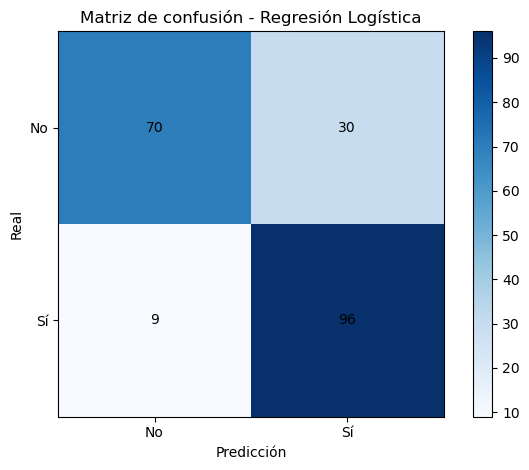


Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.89      0.70      0.78       100
           1       0.76      0.91      0.83       105

    accuracy                           0.81       205
   macro avg       0.82      0.81      0.81       205
weighted avg       0.82      0.81      0.81       205


=== Random Forest ===
Accuracy : 1.000
Precision: 1.000
Recall   : 1.000
F1-score : 1.000
AUC      : 1.000

Matriz de confusión:
[[100   0]
 [  0 105]]


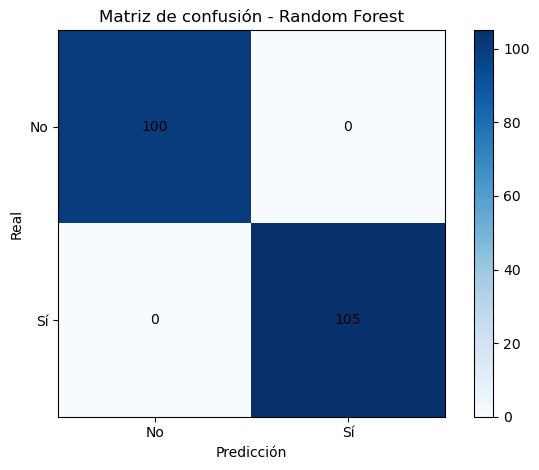


Reporte de clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       105

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205


=== SVM RBF ===
Accuracy : 0.927
Precision: 0.917
Recall   : 0.943
F1-score : 0.930
AUC      : 0.977

Matriz de confusión:
[[91  9]
 [ 6 99]]


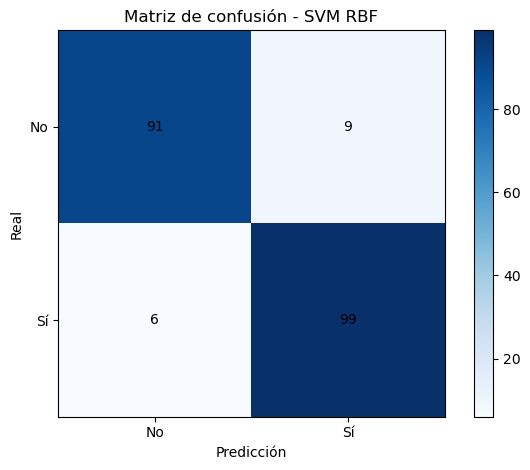


Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.94      0.91      0.92       100
           1       0.92      0.94      0.93       105

    accuracy                           0.93       205
   macro avg       0.93      0.93      0.93       205
weighted avg       0.93      0.93      0.93       205



,modelo,accuracy,precision,recall,f1,auc
0,Regresión Logística,0.809756,0.761905,0.914286,0.831169,0.929810
1,Random Forest,1.000000,1.000000,1.000000,1.000000,1.000000
2,SVM RBF,0.926829,0.916667,0.942857,0.929577,0.977143


In [20]:
resultados_ml = []

# 1) Regresión Logística
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_scaled, y_train)

y_pred_lr = log_reg.predict(X_test_scaled)
y_proba_lr = log_reg.predict_proba(X_test_scaled)[:, 1]

resultados_ml.append(
    evaluar_modelo("Regresión Logística", y_test, y_pred_lr, y_proba_lr)
)

# 2) Random Forest
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:, 1]

resultados_ml.append(
    evaluar_modelo("Random Forest", y_test, y_pred_rf, y_proba_rf)
)

# 3) SVM con kernel RBF
svc = SVC(kernel="rbf", probability=True, random_state=42)
svc.fit(X_train_scaled, y_train)

y_pred_svc = svc.predict(X_test_scaled)
y_proba_svc = svc.predict_proba(X_test_scaled)[:, 1]

resultados_ml.append(
    evaluar_modelo("SVM RBF", y_test, y_pred_svc, y_proba_svc)
)

pd.DataFrame(resultados_ml)



Entrenando MLP_1_capa con capas ocultas: (32,)


/opt/anaconda3/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


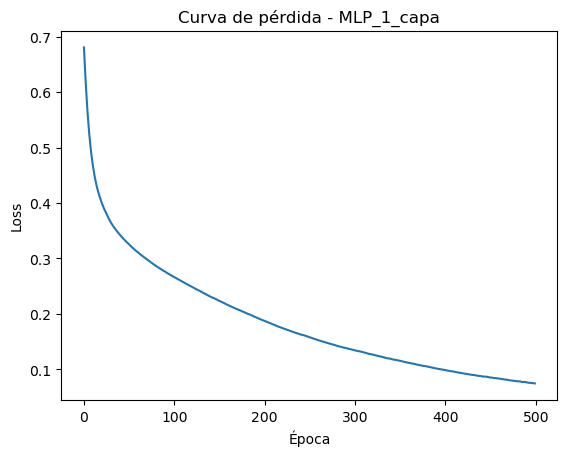


=== MLP_1_capa ===
Accuracy : 0.971
Precision: 0.963
Recall   : 0.981
F1-score : 0.972
AUC      : 0.992

Matriz de confusión:
[[ 96   4]
 [  2 103]]


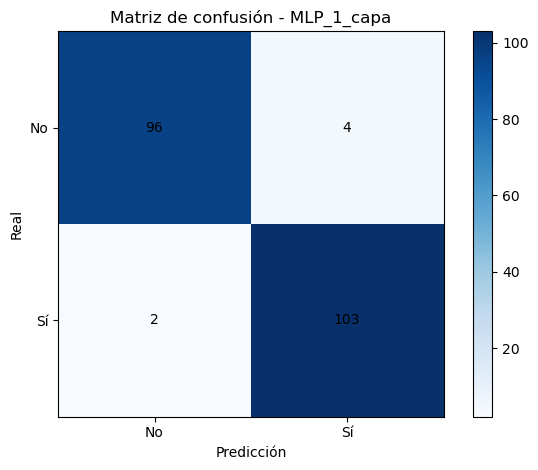


Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       100
           1       0.96      0.98      0.97       105

    accuracy                           0.97       205
   macro avg       0.97      0.97      0.97       205
weighted avg       0.97      0.97      0.97       205


Entrenando MLP_2_capas con capas ocultas: (64, 32)


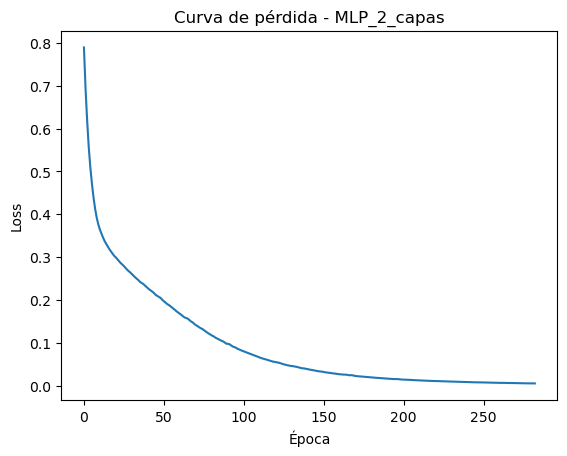


=== MLP_2_capas ===
Accuracy : 1.000
Precision: 1.000
Recall   : 1.000
F1-score : 1.000
AUC      : 1.000

Matriz de confusión:
[[100   0]
 [  0 105]]


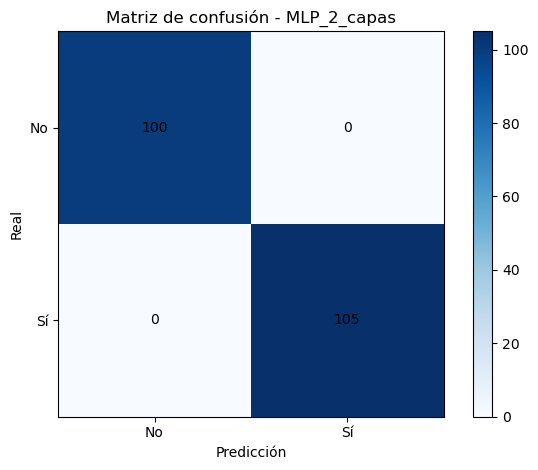


Reporte de clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       105

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205


Entrenando MLP_3_capas con capas ocultas: (128, 64, 32)


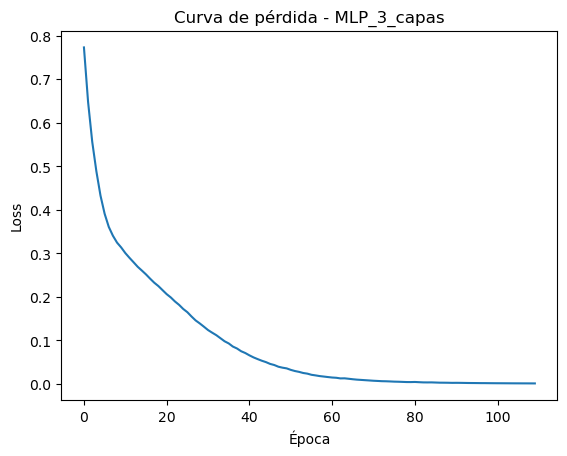


=== MLP_3_capas ===
Accuracy : 1.000
Precision: 1.000
Recall   : 1.000
F1-score : 1.000
AUC      : 1.000

Matriz de confusión:
[[100   0]
 [  0 105]]


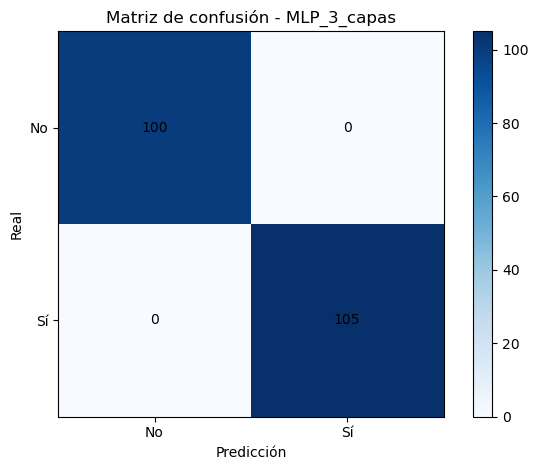


Reporte de clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       105

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



,modelo,accuracy,precision,recall,f1,auc
0,MLP_1_capa,0.970732,0.962617,0.980952,0.971698,0.991619
1,MLP_2_capas,1.000000,1.000000,1.000000,1.000000,1.000000
2,MLP_3_capas,1.000000,1.000000,1.000000,1.000000,1.000000


In [21]:
configs_mlp = {
    "MLP_1_capa": (32,),           # 1 capa oculta
    "MLP_2_capas": (64, 32),       # 2 capas ocultas
    "MLP_3_capas": (128, 64, 32),  # 3 capas ocultas
}

resultados_mlp = []

for nombre, capas in configs_mlp.items():
    print(f"\nEntrenando {nombre} con capas ocultas: {capas}")

    mlp = MLPClassifier(
        hidden_layer_sizes=capas,
        activation="relu",
        solver="adam",
        learning_rate_init=0.001,
        max_iter=500,
        random_state=42
    )

    mlp.fit(X_train_scaled, y_train)

    # Curva de pérdida (loss) como en los gráficos de Keras
    plt.figure()
    plt.plot(mlp.loss_curve_)
    plt.title(f"Curva de pérdida - {nombre}")
    plt.xlabel("Época")
    plt.ylabel("Loss")
    plt.show()

    y_pred = mlp.predict(X_test_scaled)
    y_proba = mlp.predict_proba(X_test_scaled)[:, 1]

    resultados_mlp.append(
        evaluar_modelo(nombre, y_test, y_pred, y_proba)
    )

pd.DataFrame(resultados_mlp)



=== Estrategia: Sin_balanceo ===

=== RF_Sin_balanceo ===
Accuracy : 1.000
Precision: 1.000
Recall   : 1.000
F1-score : 1.000
AUC      : 1.000

Matriz de confusión:
[[100   0]
 [  0 105]]


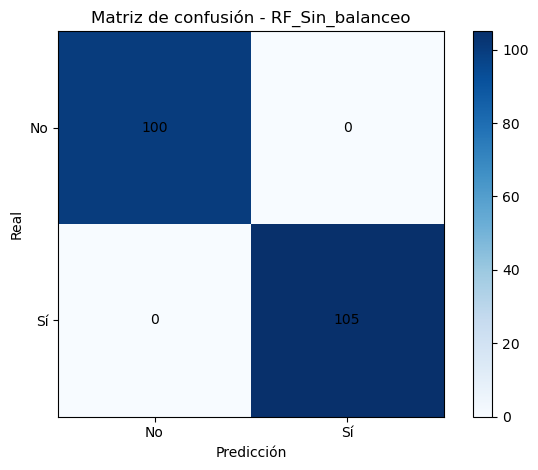


Reporte de clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       105

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205


=== Estrategia: UnderSampling ===

=== RF_UnderSampling ===
Accuracy : 1.000
Precision: 1.000
Recall   : 1.000
F1-score : 1.000
AUC      : 1.000

Matriz de confusión:
[[100   0]
 [  0 105]]


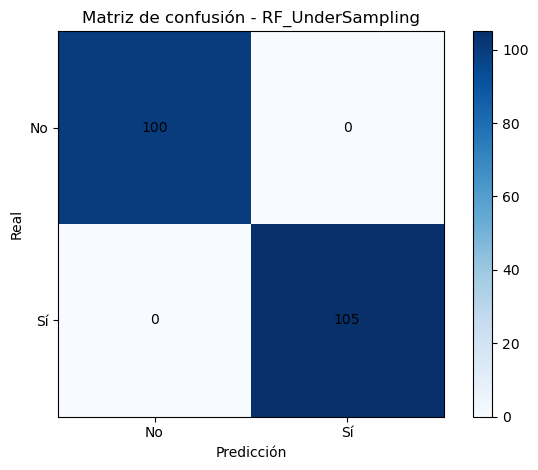


Reporte de clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       105

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205


=== Estrategia: OverSampling ===

=== RF_OverSampling ===
Accuracy : 1.000
Precision: 1.000
Recall   : 1.000
F1-score : 1.000
AUC      : 1.000

Matriz de confusión:
[[100   0]
 [  0 105]]


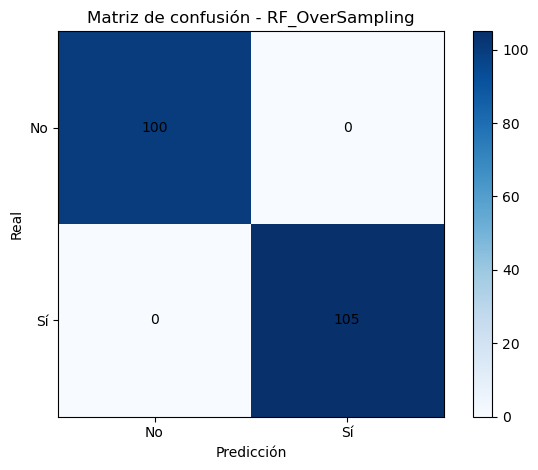


Reporte de clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       105

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205


=== Estrategia: SMOTE ===

=== RF_SMOTE ===
Accuracy : 1.000
Precision: 1.000
Recall   : 1.000
F1-score : 1.000
AUC      : 1.000

Matriz de confusión:
[[100   0]
 [  0 105]]


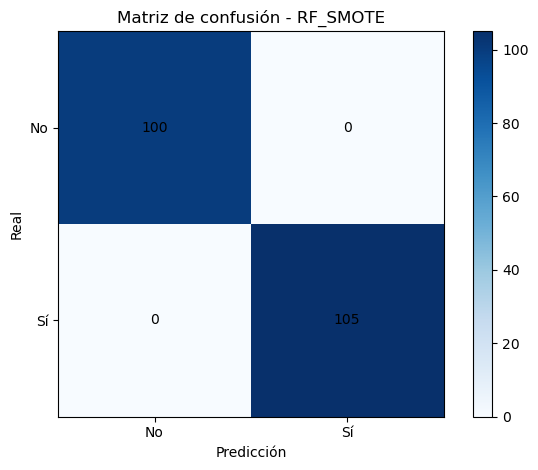


Reporte de clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       105

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



In [22]:
if imblearn_ok:
    estrategias = {
        "Sin_balanceo": None,
        "UnderSampling": RandomUnderSampler(random_state=42),
        "OverSampling": RandomOverSampler(random_state=42),
        "SMOTE": SMOTE(random_state=42)
    }

    resultados_bal = []

    for nombre_est, sampler in estrategias.items():
        print(f"\n=== Estrategia: {nombre_est} ===")

        if sampler is not None:
            X_res, y_res = sampler.fit_resample(X_train, y_train)
        else:
            X_res, y_res = X_train, y_train

        rf_bal = RandomForestClassifier(n_estimators=200, random_state=42)
        rf_bal.fit(X_res, y_res)

        y_pred = rf_bal.predict(X_test)
        y_proba = rf_bal.predict_proba(X_test)[:, 1]

        resultados_bal.append(
            evaluar_modelo(f"RF_{nombre_est}", y_test, y_pred, y_proba)
        )

    pd.DataFrame(resultados_bal)
else:
    print("Saltando sección de balanceo porque imblearn no está disponible.")


  0%|          | 0/50 [00:00<?, ?it/s]


=== SHAP - Importancia global de características (bar plot) ===


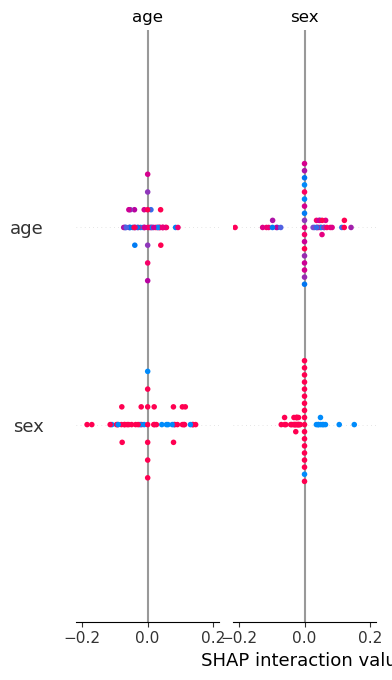


=== SHAP - Summary plot (beeswarm) ===


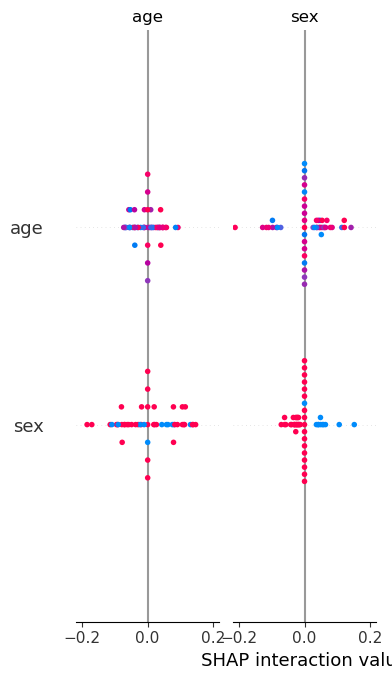

In [ ]:
# CELDA SHAP UNIVERSAL (funciona con cualquier modelo con predict_proba)

if shap_ok:
    import shap
    import numpy as np
    import matplotlib.pyplot as plt

    modelo_final = rf   

    X_sample = X_test.sample(min(50, len(X_test)), random_state=42)

    background = shap.sample(X_train, min(50, len(X_train)))

    explainer = shap.KernelExplainer(modelo_final.predict_proba, background)

    shap_values = explainer.shap_values(X_sample)

    if isinstance(shap_values, list):
        sv = np.array(shap_values[1])   # clase "enfermedad"
    else:
        sv = np.array(shap_values)

    #    (soluciona: "The shape of the shap_values matrix does not match...")
    n_features_data = X_sample.shape[1]
    n_features_shap = sv.shape[1]

    if n_features_shap > n_features_data:
        sv = sv[:, :n_features_data]           # recortamos columnas sobrantes
    elif n_features_shap < n_features_data:
        # En el caso raro de menos columnas, recortamos X_sample también
        X_sample = X_sample.iloc[:, :n_features_shap]

    #Gráfico 1: Importancia global (bar plot)
    print("\n=== SHAP - Importancia global de características (bar plot) ===")
    shap.summary_plot(sv, X_sample, plot_type="bar", feature_names=X.columns)

    # Gráfico 2: Summary plot (beeswarm) → ESTE VA AL INFORME
    print("\n=== SHAP - Summary plot (beeswarm) ===")
    shap.summary_plot(sv, X_sample, feature_names=X.columns)

else:
    print("SHAP no está disponible o no se pudo importar correctamente.")
